# COGS 108 - Final Project 

# Overview

Nowadays, due to the huge variety of moblie applications, the competition inside the market is extremely high. Every application that wants to be successful has to utilize all available data in order to improve its quality and to avoid possible decisions that could detriment its success. Thus, correct analysis of different phenomena related to applications and discovery of any hidden patterns inside relevant data are essential in helping applications achieve these goals.

Our team came up with the idea that an application's name could be an influential indicator of its success, and we hope to explore upon this idea in our project.

# Names

- Aliaksandr Samushchyk
- Jiayi Zhang
- Soumya Agrawal
- Richard Duong
- Titan Ngo
- Yaman Jandali

# Group Members IDs

- A15672156
- A14533542
- A14402679
- A15196673
- A15525832
- A15753076

# Research Question

1) Is the length of an app’s name significant in explaining its success?

2) Are there any words/letters/combinations of letters that tend to be present in successful applications?

TODO EDA:
- outliers - historgram before taking out outliers, talk about outliers, take out outliers, show graph w/out outliers
- EDA: compute mean of diff values 
- EDA: df.corr() 

- TODO - put everything in one file!! Titan

- TODO - We drop everything outside 2 standard deviations (after histograms)

main TODO - BEAUTIFY and write things along eda

## Background and Prior Work

The dataset that we found presents a lot of interesting insights about user
preferences, and we want to explore the effects of certain user preferences on app
rating and popularity.
There is not a lot of background knowledge that we know about user preferences
affecting app popularity other than the obvious correlations between app
rating/popularity, so we would like to use the data to try and find more subtle biases
that might affect it such as title/title length, etc.

References:
- 1)
“A Statistical Analysis of the Apple App Store” by Colin Eberhardt
Did a statistical analysis of prices of apps in the Apple App store. Did not do much
other than basic statistical analysis, such as looking at the genre distribution of apps
and the price differences across genres. Found a positive correlation between price
and app rating.
Source: https://blog.scottlogic.com/2014/03/20/app-store-analysis.html
- 2)
Did a statistical analysis of various factors that contribute to the success of an app in
the Google Play Store. Found that most free apps are monetized by advertisements.
Learned that ~80% of apps on the playstore have been downloaded less than 50k
times. Found that a small amount of users who install actually take the time to write
a review.
Source:
https://nycdatascience.com/blog/student-works/web-scraping/analysis-of-apps-in-th
e-google-play-store/

The scope of our project is a bit beyond the analysis that these projects present, but
in a similar vein. While these projects analyzed the more basic factors that weigh in
the success of an app, we will be focusing more on subtle user preferences that are
not as obvious to correlate to success.

# Hypothesis


We will measure the success of an application using a few metrics such as the number of installations, the rating of an application, and the number of reviews for the app combined with sentiment analysis of the content of these reviews. We expect that thetitle has an influence on the
applications’ success. In particular, we expect the length of
titles to be a significant explanatory variable; from our point of view, the more time you spend to read the names of anything the less interest you keep. We also expect that other features of applications such as cost, size, and category are important in explaining
success. We will also try to build a machine learning algorithm at the end of our project, that will provide the probability of an app’s success and classify whether an app is successful given its title.

# Dataset(s)

- Dataset Name: Google Play Store Apps
- Link to the dataset: https://www.kaggle.com/lava18/google-play-store-apps?fbclid=IwAR0I6EIgxdnc3LWhwVVg85gZ9RokprTW6xDo47EQxwDu5Qkce24ZC2MbIBs#googleplaystore_user_reviews.csv
- Number of observations: 64.3k

TODO - take out sentiment 

This dataset provides up with a zipped folder containing two files. The first file has around 64.3k observations, with 5 variables. These include the app name, translated review, sentiment, sentiment polarity, and sentiment subject. Most of these variables have been preprocessed already, such as the translated review and sentiment. Many observations in this file (or the reviews), are for the same app. As for the second file, there are around 10.8k observations with 13 variables. The variables include app name, category of the app, the overall user rating, number of reviews, size of the app, number of installs, whether the app is paid or free, the price of the app, the content rating, the genres, when the data was last updated, the current version of the app available on the app store, and the minimum required Android version for the app. With these different features of the app, we will be able to ask our main question, which centers around the popularity of an app, and what makes it popular. Using the sentiment analysis on the reviews and analysis on the title (popular keywords in titles, length of the titles), we can determine factors other than the rating or number of installs to determine an app's popularity.

# Setup

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Data Cleaning

First of all, to get the most important and necessary data from our dataset, we first need to clean the data because it contains some information that won't be helpful such as Current Version and Android Version. After cleaning the data, we were left with application name, category, rating, reviews, size, installs, type, price, etc. 

Also, the second dataset contains the reviews for over 1000 apps, and preprocessed indicator sentiment, sentiment_polarity, etc. We will also clean this dataset and use the latter three preprocessed information as deference for our analysis. 

In [16]:
#upload the data set
df = pd.read_csv('gpsa/googleplaystore.csv')
df_review = pd.read_csv('gpsa/googleplaystore_user_reviews.csv')

#dropping unnecessary data, Genres is very repetitive information compare to Category
df = df.drop(['Genres','Current Ver', 'Android Ver'], axis=1)

#drop all NaNs in first dataset, and for Translated_Review in second dataset
df = df.dropna()
df_review = df_review.dropna(subset = ['Translated_Review'])

#Visualization of the main dataset after cleaning
df

#Question:
#How to merge these two dataset?

,App,Category,Rating,Reviews,...,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,...,Free,0,Everyone,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,...,Free,0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,...,Free,0,Everyone,"August 1, 2018"
...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,...,Free,0,Everyone,"July 6, 2018"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,...,Free,0,Mature 17+,"January 19, 2015"
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,...,Free,0,Everyone,"July 25, 2018"


In [17]:
# We decided to configure out settings exactly like we did for A2

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

We have two main files in our data set: googleplaystore.csv and googleplaystore_user_reviews.csv

For analysis of app names, we can focus on just the first data set.

In [18]:
df = pd.read_csv("gpsa/googleplaystore.csv")

In [19]:
#show the headers of the different columns
print(list(df.columns.values))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [21]:
#It turns out that the reviews (number of) column is a column of strings
#Every time the number of reviews is in the millions, it is denoted with 'M'
#We need to fix all occurences of this to properly typecast

#We replace the instances of 'M' in the original column with E6
df['Reviews'] = df['Reviews'].replace({'M': 'E6'}, regex=True)

In [22]:
#The E6 allows us to convert the column of strings into a column of floats since
        #E6 is evaluated as *1000000
    
df['Reviews'] = df['Reviews'].astype(float)

In [23]:
#We drop everything outside 2 std

df['Word Count'] = df['App'].str.split().str.len()

In [24]:
df['Char Count'] = df['App'].str.len() - df['App'].str.count(' ')

In [25]:
#Remove any rows with null values
df = df.dropna(how='any')

In [26]:
df

,App,Category,Rating,Reviews,...,Current Ver,Android Ver,Word Count,Char Count
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,...,1.0.0,4.0.3 and up,9,38
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,...,2.0.0,4.0.3 and up,3,17
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,...,1.2.4,4.0.3 and up,10,41
...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,...,1.0,4.1 and up,5,28
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,...,Varies with device,Varies with device,6,24
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,...,Varies with device,Varies with device,7,39


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

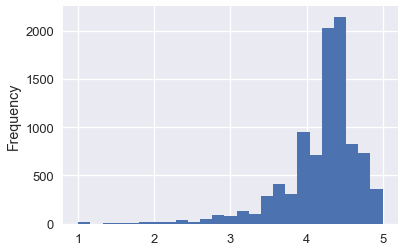

In [27]:
## YOUR CODE HERE
df['Rating'].plot.hist(bins = 25)
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

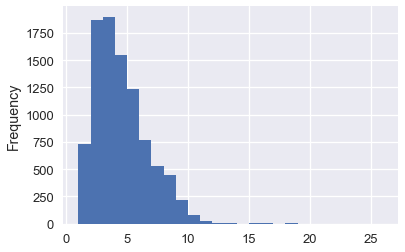

In [30]:

df['Word Count'].plot.hist(bins = 25)
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

Text(0.5,0,'Char Count')

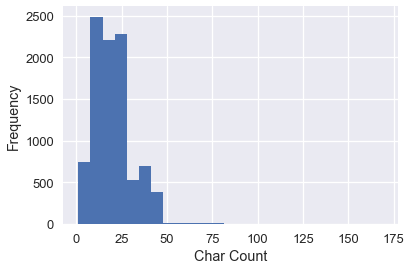

In [33]:
df['Char Count'].plot.hist(bins = 25)


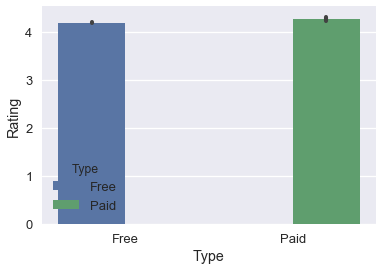

In [38]:
sns.barplot(x='Type', 
            y='Rating', 
            hue='Type', 
            data=df);

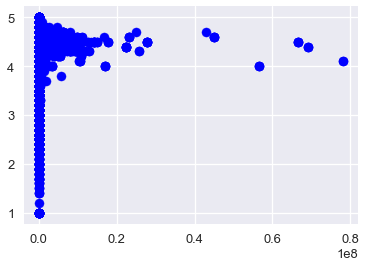

In [39]:
x = df['Reviews']
y = df['Rating']
plt.scatter(x, y, c='blue')

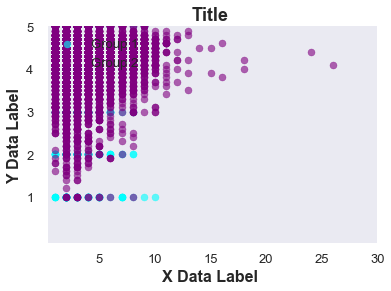

In [44]:
# Create a new figure
fig = plt.figure()
# Add an axes to our figureax = plt.axes()
ax = plt.axes()

x = df['Word Count']
y1 = df['Reviews']
y2 = df['Rating']

# Plot the data again
ax.scatter(x, y1, c='cyan', alpha=0.6, label='Group 1', s=50)
plt.hold
ax.scatter(x, y2, c='purple', alpha=0.6, label='Group 2', s=50)
# Here we've added some more optional arguments. 
# alpha - sets the transparency of the data points
# label - makes a label for the data we've plotted, which can be used in the legend
# s - size. Changes the size of the dots we plot

# Add a title to our graph
plt.title('Title', fontsize=18, fontweight='bold')

# Add data labels
plt.xlabel('X Data Label', fontsize=16, fontweight='bold')
plt.ylabel('Y Data Label', fontsize=16, fontweight='bold')

# Set the ranges to plot of the x and y variables
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

# Set the tick labels
ax.set_xticks(np.array([5,10,15,20,25,30]))
ax.set_yticks(np.array([1,2,3,4,5]))

# hide grid lines
ax.grid(False)

# Turn the top and right side lines off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick marks to only be on the bottom and the left. 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Set linewidth of remaining spines
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add a legend. This will use the labels you defined when you set the data.
plt.legend(loc='upper left', scatterpoints=1, frameon=False)
# Legend doesn't require any arguments. 
# Here we optionally specify where to put the legend ('loc'), how many points to use 
#  in the legend ('scatterpoints'), and wether to have a box around the legend ('frameon')

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*